# Bank Customer Churn Prediction

In [100]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import autoreload
import missingno as msno
import os
import csv
import sys

from collections import defaultdict, Counter

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

sb.set()
sb.set_style('darkgrid')

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

In [101]:
df = pd.read_csv("D:\Open Classroom\Datasets\Bank Customer Churn Dataset\Bank Customer Churn Prediction.csv")
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [102]:
df.shape

(10000, 12)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [104]:
round(df.describe())

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,15690941.0,651.0,39.0,5.0,76486.0,2.0,1.0,1.0,100090.0,0.0
std,71936.0,97.0,10.0,3.0,62397.0,1.0,0.0,0.0,57510.0,0.0
min,15565701.0,350.0,18.0,0.0,0.0,1.0,0.0,0.0,12.0,0.0
25%,15628528.0,584.0,32.0,3.0,0.0,1.0,0.0,0.0,51002.0,0.0
50%,15690738.0,652.0,37.0,5.0,97199.0,1.0,1.0,1.0,100194.0,0.0
75%,15753234.0,718.0,44.0,7.0,127644.0,2.0,1.0,1.0,149388.0,0.0
max,15815690.0,850.0,92.0,10.0,250898.0,4.0,1.0,1.0,199992.0,1.0


In [105]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

Text(0.5, 1.0, 'Correlation relation between columns')

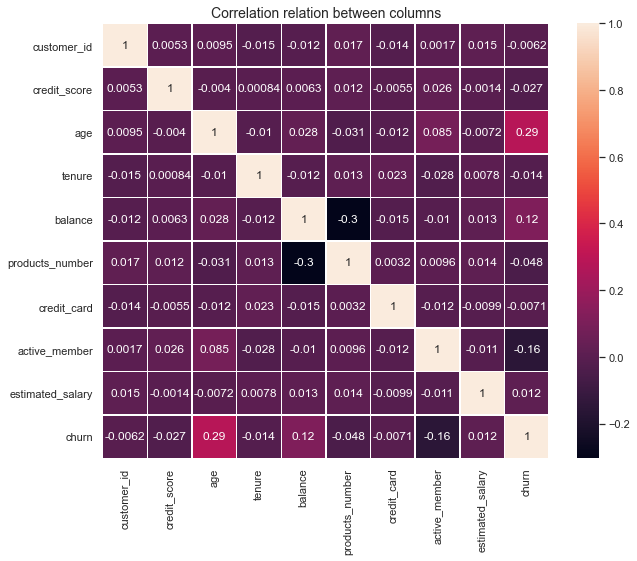

In [106]:
plt.figure(figsize = (10, 8))
sb.heatmap(df.corr(), annot = True, linewidths=0.4)
plt.title('Correlation relation between columns', fontdict={'size':14})

In [107]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Text(0.5, 1.0, 'Country population against gender')

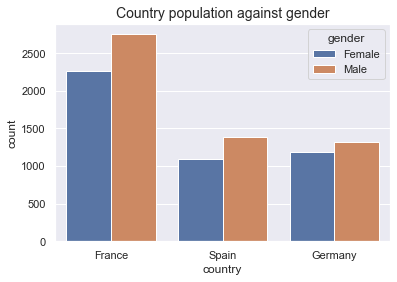

In [108]:
sb.countplot(df['country'], hue = df['gender'])
plt.title('Country population against gender', fontdict={'size':14})

Text(0.5, 1.0, 'Age Distribution Plot')

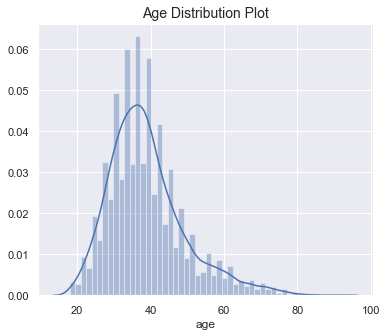

In [109]:
plt.figure(figsize = (6, 5))
sb.distplot(df['age'])
plt.title('Age Distribution Plot', fontdict={'size':14})

In [110]:
country_score = df.groupby('country')
round((country_score['credit_score'].sum() * 100) / df['credit_score'].sum(), 2)

country
France     50.07
Germany    25.13
Spain      24.80
Name: credit_score, dtype: float64

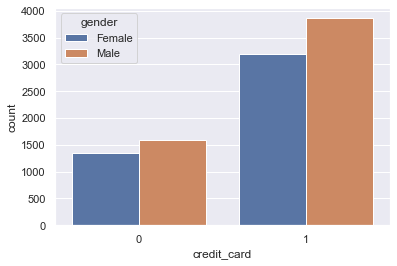

In [111]:
sb.countplot(df['credit_card'], hue = df['gender'])

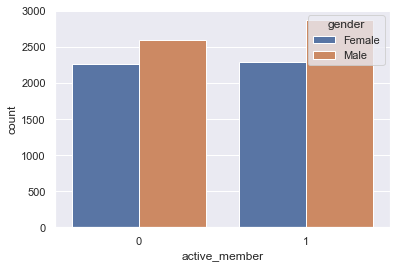

In [112]:
sb.countplot(df['active_member'], hue = df['gender'])

### Feature Engineering

In [113]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [114]:
le = LabelEncoder()

df['country'] = le.fit_transform(df['country'])
df['gender'] = le.fit_transform(df['gender'])

In [115]:
x = df.drop(columns = ['churn'])
y = df['churn']

In [116]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
print('x_train', x_train.shape)
print('x_test', x_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

x_train (8000, 11)
x_test (2000, 11)
y_train (8000,)
y_test (2000,)


#### Build and Evaluate Classification Models

#### 1. Decision Tree Model

In [150]:
dtc = DecisionTreeClassifier()

dtc.fit(x, y)

dtc_pred = dtc.predict(x_train)
dtc_score = accuracy_score(dtc_pred, y_train)

print('Accuracy Score', dtc_score)
dtc_pred


Accuracy Score 1.0


array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

#### 2. Support Vector Machine

In [135]:
svc_model = SVC()

svc_model.fit(x, y)

svc_pred = svc_model.predict(x_train)
svc_score = accuracy_score(svc_pred, y_train)

print('Accuracy Score:', svc_score)
svc_pred

Accuracy Score: 0.7945


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### 3. Random Forest Classifier

In [136]:
rfc = RandomForestClassifier()

rfc.fit(x, y)

rfc_pred = rfc.predict(x_train)
rfc_score = accuracy_score(rfc_pred, y_train)

print('Accuracy score:', rfc_score)
rfc_pred

Accuracy score: 1.0


array([0, 0, 0, ..., 0, 0, 1], dtype=int64)